## Apple stork prices - forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AAPL.csv')

In [ ]:
data.head(10)

In [ ]:
data.shape

In [ ]:
data.dtypes

### Data preprocessing

In [3]:
data.set_index("date", inplace=True)
data.index = pd.to_datetime(data.index)

In [4]:
data = data.drop(['symbol','Unnamed: 0','splitFactor', 'divCash'],axis=1)

In [5]:
data.isnull().sum()

close        0
high         0
low          0
open         0
volume       0
adjClose     0
adjHigh      0
adjLow       0
adjOpen      0
adjVolume    0
dtype: int64

In [ ]:
data.duplicated().sum()

In [ ]:
import matplotlib.pyplot as plt

def plot_columns(data, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(20, 5*num_columns))
    
    color = 'navy'  # Odabir jedne boje za sve linije
    
    for i, column in enumerate(columns):
        ax = axes[i] if num_columns > 1 else axes
        ax.plot(data[column], color=color, linewidth=2)
        ax.set_title(column.capitalize(), fontsize=14, fontweight='bold', color=color)
        ax.set_xlabel('Date', fontsize=12, fontstyle='italic', color='black')
        ax.set_ylabel('Value', fontsize=12, fontstyle='italic', color='black')
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
        ax.tick_params(axis='both', which='minor', labelsize=8, colors='black')
        ax.spines['top'].set_linestyle('--')
        ax.spines['right'].set_linestyle('--')
    
    plt.tight_layout()
    plt.show()

# Primer korišćenja:
columns = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
plot_columns(data, columns)


In [ ]:

sns.set_style("whitegrid")

num_cols = 4 
num_rows = (len(data.columns) - 2) // num_cols + 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(data.columns[:]):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data[column], kde=True, ax=axes[row, col], color='navy')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14, fontweight='bold', color='navy')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')
    axes[row, col].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[row, col].tick_params(axis='both', which='minor', labelsize=8, colors='black')

for i in range(len(data.columns[1:]), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [ ]:
corr_matrix = data.corr()

# Prebaci ovo gore kod definicije funkcija, ovde samo pozovi
def plot_correlation_heatmap(corr_matrix):
    plt.figure(figsize=(10, 8))
    cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold', color='midnightblue')
    plt.xlabel('Features', fontsize=14, fontstyle='italic', color='midnightblue')
    plt.ylabel('Features', fontsize=14, fontstyle='italic', color='midnightblue')
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()

plot_correlation_heatmap(corr_matrix)


In [ ]:
data.columns

In [ ]:
# import numpy as np

# # Izdvajanje samo kolone 'close'
# close_prices = data['close']

# # Određivanje tačke odsecanja za testiranje (poslednjih 20% podataka)
# test_size = int(len(close_prices) * 0.2)

# # Podela podataka na train i test skupove
# train_data = close_prices[:-test_size]
# test_data = close_prices[-test_size:]

# # Ispis dimenzija train i test skupova
# print("Dimenzije train skupa:", train_data.shape)
# print("Dimenzije test skupa:", test_data.shape)

# # Pretvaranje u numpy nizove i reshape
# train_data = train_data.values.reshape((-1, 1))
# test_data = test_data.values.reshape((-1, 1))

# # Ispis dimenzija train i test skupova nakon reshape-a
# print("Dimenzije train skupa:", train_data.shape)
# print("Dimenzije test skupa:", test_data.shape)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# scaler = MinMaxScaler(feature_range=(0,1))
# # data_scaled = scaler.fit_transform(np.array(data).reshape(-1,1))
# test_data = scaler.fit_transform(test_data)
# train_data = scaler.fit_transform(train_data)

In [ ]:
# train_data.shape

In [ ]:
# data_scaled.shape

In [ ]:
# train_size = int(len(data_scaled) * 0.75)

# train_data, test_data = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]


# print("Dimenzije train_data:", train_data.shape)
# print("Dimenzije test_data:", test_data.shape)


In [6]:
data2 = data['close']

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(np.array(data2).reshape(-1,1))

In [9]:
train_size = int(len(data_scaled) * 0.75)

train_data, test_data = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

print("Dimenzije train_data:", train_data.shape)
print("Dimenzije test_data:", test_data.shape)

train_data

Dimenzije train_data: (943, 1)
Dimenzije test_data: (315, 1)


array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [10]:
import numpy as np 
def create_sequences(data, sequence_length):
    X, y = [], []

    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])

    return np.array(X), np.array(y)

In [11]:
sequence_length = 100
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True)

In [14]:
def plot_train_history(history):
    plt.figure(figsize=(15, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Epochs', fontsize=14, fontstyle='italic', color='black')
    plt.ylabel('Loss', fontsize=14, fontstyle='italic', color='black')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()


In [15]:
import sklearn.metrics as metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error

all_results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2', 'MSE', 'MAPE', 'MSLE'])

def test_model(model, model_name, X_test, y_test, end=-1):    
    X_test = X_test[:end]
    y_test = y_test[:end]
    y_pred = model.predict(X_test).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # msle = mean_squared_log_error(y_test, y_pred)
    msle = 0
    all_results.loc[len(all_results)] = [model_name, rmse, mae, r2, mse, mape, msle]

    plt.figure(figsize=(15, 6))
    plt.plot(y_test, label='True', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.title(f'{model_name} Predictions', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Time', fontsize=14, fontstyle='italic', color='black')
    plt.ylabel('Value', fontsize=14, fontstyle='italic', color='black')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()

    display(all_results[-1:])

# Dodatne metrike
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




In [16]:
from keras.layers import SimpleRNN
from tensorflow import optimizers

model_srnn = Sequential()

model_srnn.add(SimpleRNN(units = 20,
                         activation = "relu",
                         return_sequences = False,
                         input_shape = (X_train.shape[1],1)))

model_srnn.add(Dense(20, activation='relu'))

model_srnn.add(Dense(units = 1))

model_srnn.compile(optimizer="adam",
                  loss = "mean_squared_error")

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
history = model_srnn.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.1)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - val_loss: 0.0012
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.1176e-04 - val_loss: 5.5240e-04
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.6144e-04 - val_loss: 4.8420e-04
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3808e-04 - val_loss: 4.8739e-04
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0953e-04 - val_loss: 4.8124e-04
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1275e-04 - val_loss: 4.8080e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0480e-04 - val_loss: 4.7660e-04
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1494e-04 - val_loss: 4.8073e-04
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0747e-04 - val_loss: 5.5137e-04
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1607e-04 - val_loss: 4.7843e-04
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2010e-04 - val_

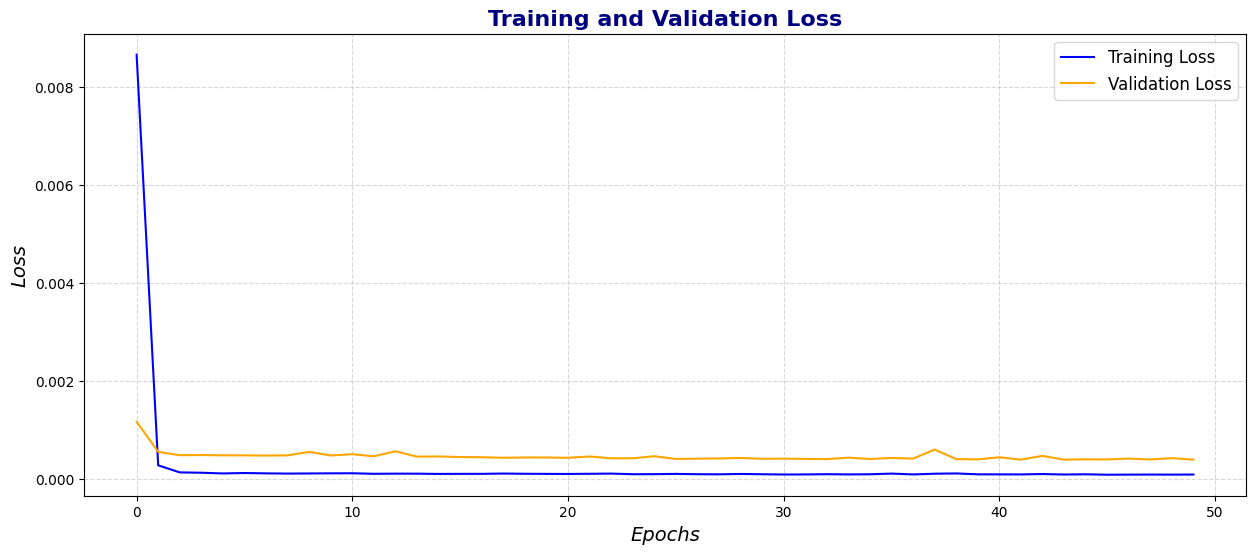

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


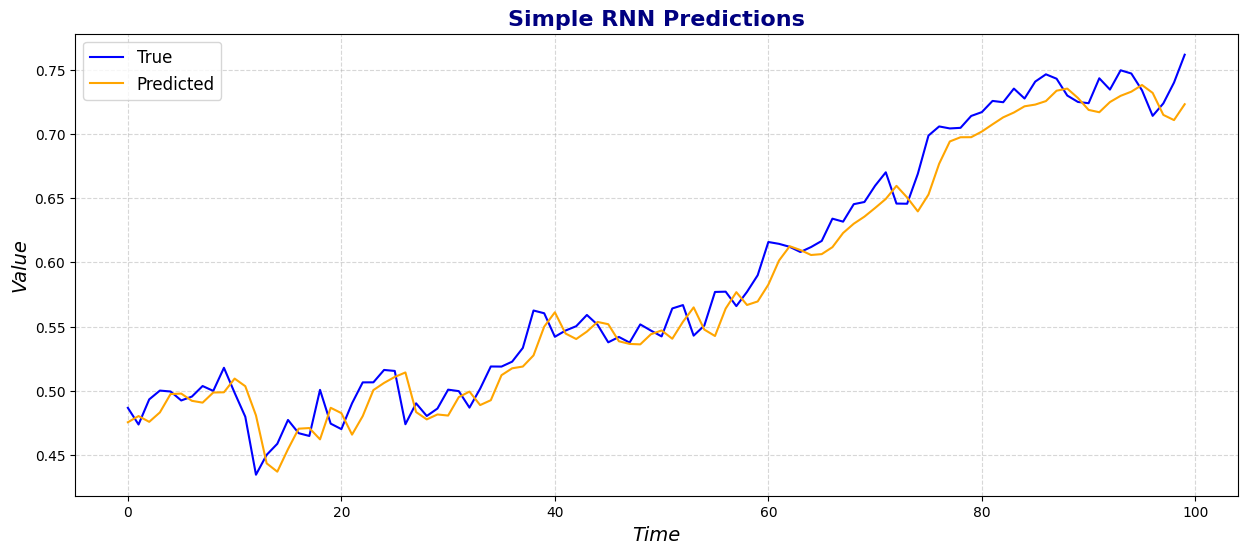

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
0,Simple RNN,0.017651,0.0143,0.96659,0.000312,18.205122,0


In [18]:
from keras.models import load_model
plot_train_history(history)
# best_model = load_model('best_model.keras')
test_model(model_srnn, 'Simple RNN',
           X_test, y_test, 100)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Squared Error: 0.0010922072899329127


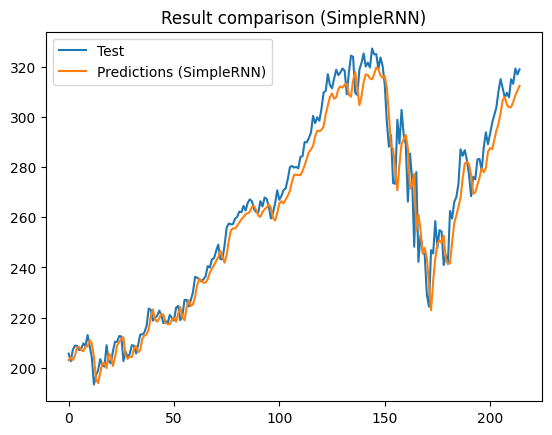

In [19]:
prediction = model_srnn.predict(X_test)
mse = np.mean((prediction - y_test) ** 2)
print("Mean Squared Error:", mse)
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test), label="Test")
plt.plot(range(len(y_test)), scaler.inverse_transform(prediction), label="Predictions (SimpleRNN)")
plt.legend()
plt.title("Result comparison (SimpleRNN)")
plt.show()

In [69]:
model_complex = Sequential()
model_complex.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_complex.add(Dropout(0.2))
model_complex.add(SimpleRNN(100, activation="relu", return_sequences=True))
model_complex.add(Dropout(0.2))
model_complex.add(SimpleRNN(100, activation="relu"))
model_complex.add(Dense(1))


model_complex.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.001))
model_complex.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_51 (SimpleRNN)       │ (None, 100, 100)       │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_52 (SimpleRNN)       │ (None, 100, 100)       │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_53 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,501 (197.27 KB)

 Trainable params: 50,501 (197.27 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Ovo je dobro, sa 100 epohe (probano)
history_complex = model_complex.fit(X_train, y_train,
                    epochs=10, batch_size=16,
                    validation_split=0.1)

Epoch 1/10


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 1.3872e-04 - val_loss: 4.1416e-04
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 1.0561e-04 - val_loss: 5.0781e-04
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.3088e-04 - val_loss: 3.9397e-04
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 1.3488e-04 - val_loss: 3.5431e-04
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.2230e-04 - val_loss: 3.7220e-04
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.2450e-04 - val_loss: 4.1107e-04
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.5985e-04 - val_loss: 3.1570e-04
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 1.2483e-04 - val_loss: 5.6657e-04
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 1.1065e-04 - val_loss: 4.6993e-04
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 1.4790e-04 - val_loss: 5.0735e-04


In [74]:
history_complex2 = model_complex.fit(X_train, y_train,
                    epochs=10, batch_size=8,
                    validation_split=0.1)

Epoch 1/10


95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 1.2281e-04 - val_loss: 3.5998e-04
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 1.3585e-04 - val_loss: 7.2975e-04
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1.5556e-04 - val_loss: 3.5452e-04
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 1.5945e-04 - val_loss: 3.6427e-04
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1.4451e-04 - val_loss: 3.7246e-04
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1.3373e-04 - val_loss: 4.6712e-04
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 1.1655e-04 - val_loss: 7.3193e-04
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.4304e-04 - val_loss: 3.4008e-04
Epoch 9/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 1.4244e-04 - val_loss: 4.2713e-04
Epoch 10/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 1.6820e-04 - val_loss: 3.9015e-04


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean Squared Error: 0.017859830911261036


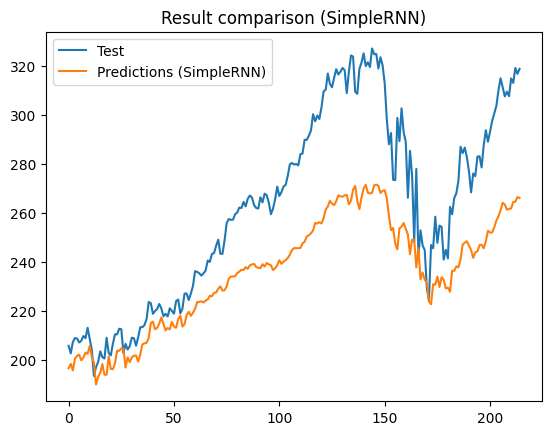

In [78]:
prediction = model_complex.predict(X_test)
mse = np.mean((prediction - y_test) ** 2)
print("Mean Squared Error:", mse)
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test), label="Test")
plt.plot(range(len(y_test)), scaler.inverse_transform(prediction), label="Predictions (SimpleRNN)")
plt.legend()
plt.title("Result comparison (SimpleRNN)")
plt.show()

### Data preprocessing

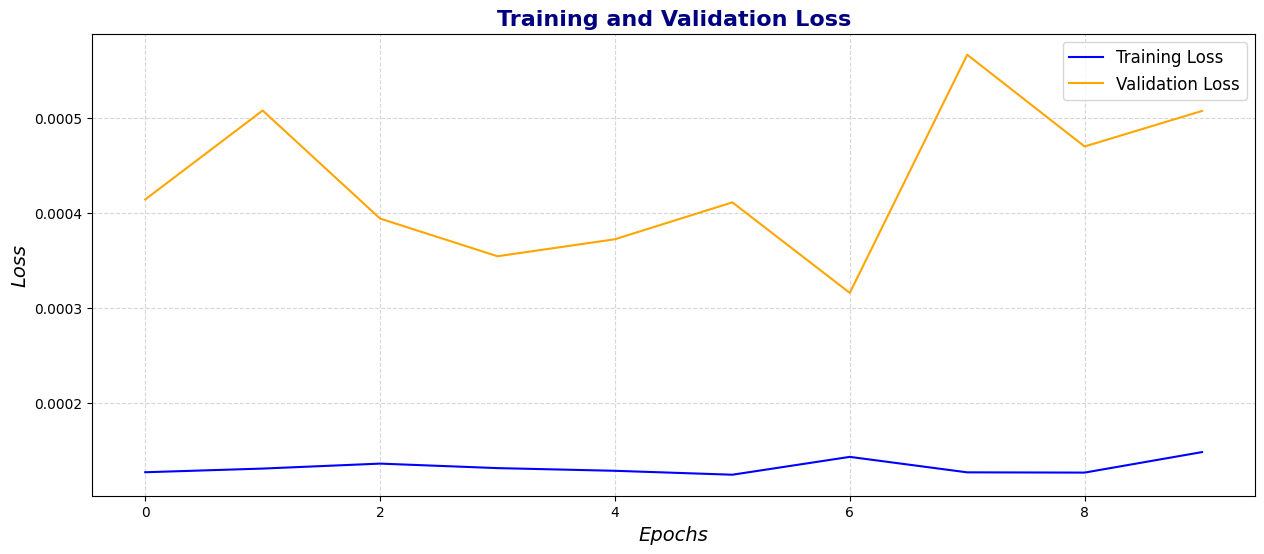

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


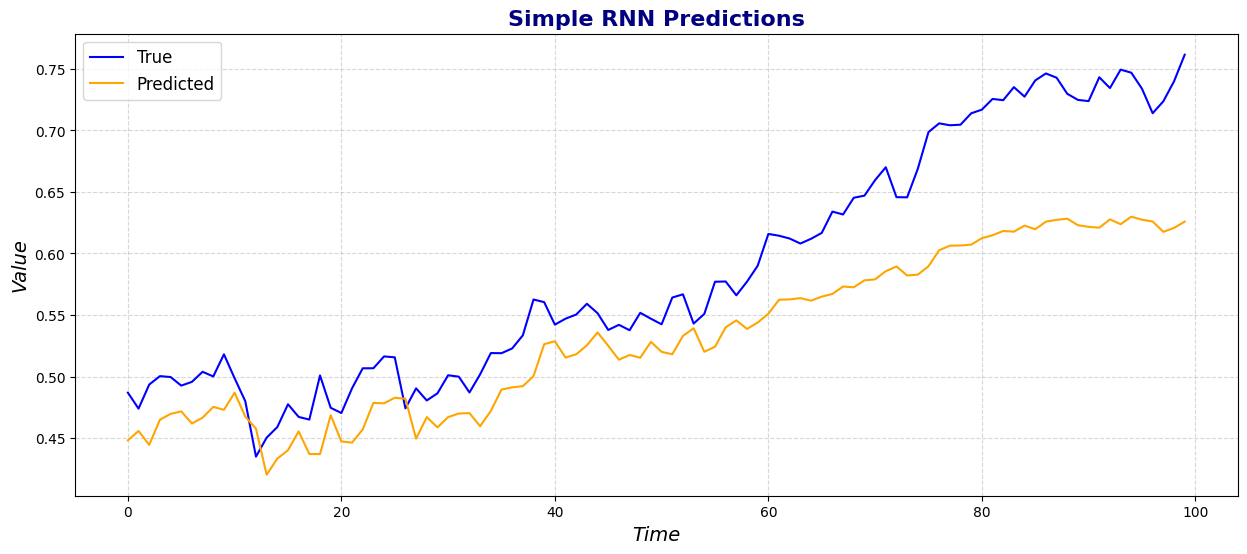

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
1,Simple RNN,0.06586,0.055321,0.534837,0.004338,16.563978,0


In [79]:
plot_train_history(history_complex)
# best_model = load_model('best_model.keras')
test_model(model_complex, 'Simple RNN',
           X_test, y_test, 100)

In [ ]:
model_sequential = Sequential()
model_sequential.add(SimpleRNN(50, input_shape=(100, 1)))
model_sequential.add(Dense(1))
model_sequential.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.00001))
model_sequential.summary()

In [ ]:
history = model_sequential.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history)
best_model = load_model('best_model.keras')
test_model(model_sequential, 'Simple RNN',
           X_test, y_test, 200)

In [80]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(100, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.001))
model_lstm.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history_lstm = model_lstm.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.1)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0137 - val_loss: 0.0029
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 3.6359e-04 - val_loss: 0.0014
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3.3861e-04 - val_loss: 0.0015
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 3.1242e-04 - val_loss: 0.0013
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.9332e-04 - val_loss: 0.0012
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 3.0286e-04 - val_loss: 0.0016
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.6706e-04 - val_loss: 0.0012
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 2.8794e-04 - val_loss: 0.0014
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 3.1461e-04 - val_loss: 0.0011
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 2.7671e-04 - val_loss: 0.0010
Epoch 12/50
24/24 ━━━━━━━━━

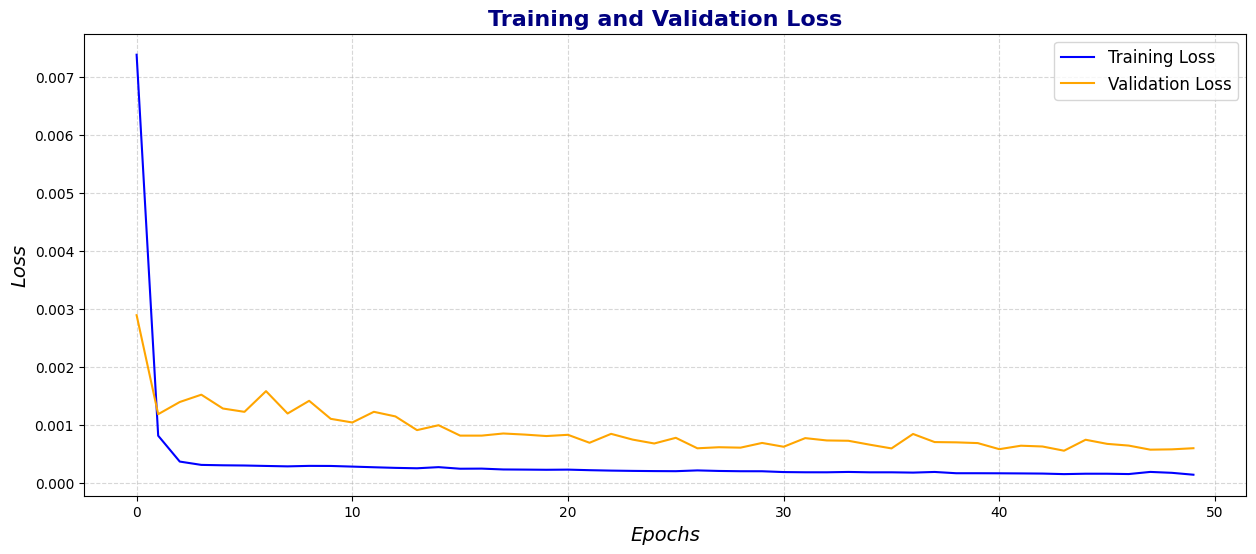

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


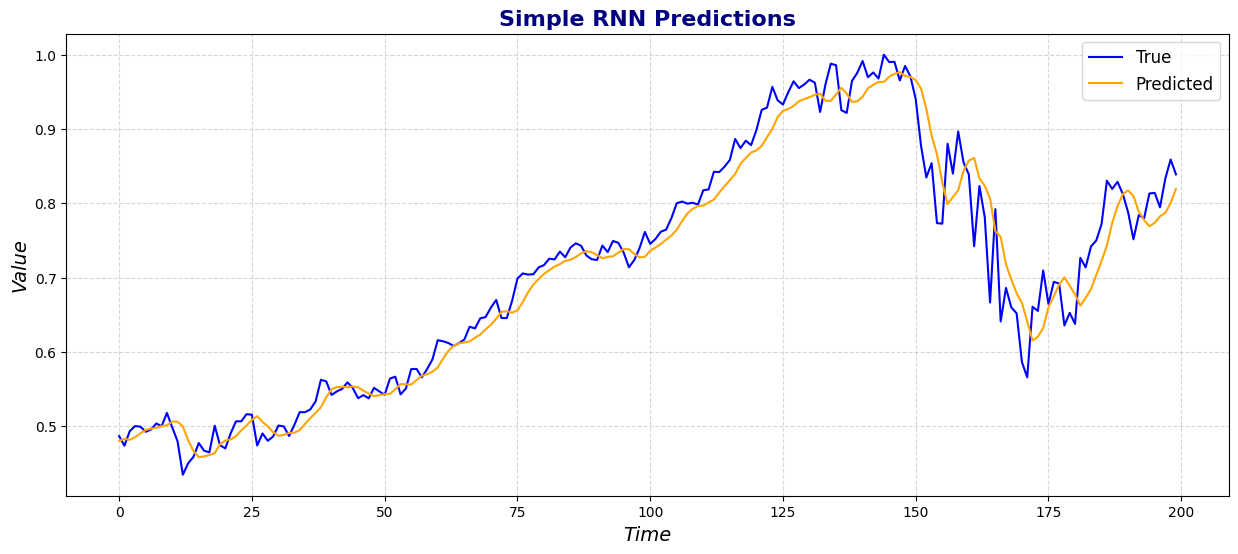

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
2,Simple RNN,0.033981,0.02494,0.954817,0.001155,26.909042,0


In [82]:
plot_train_history(history_lstm)
best_model = load_model('best_model.keras')
test_model(model_lstm, 'Simple RNN',
           X_test, y_test, 200)

In [83]:
model_multiple_lstm = Sequential()
model_multiple_lstm.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_multiple_lstm.add(LSTM(50))
model_multiple_lstm.add(Dense(1))
model_multiple_lstm.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0015))
model_multiple_lstm.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history_multiple_lstm = model_multiple_lstm.fit(X_train, y_train,
                    epochs=100, batch_size=64,
                    validation_split=0.1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.0272 - val_loss: 0.0075
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 7.5640e-04 - val_loss: 0.0039
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 6.9875e-04 - val_loss: 0.0019
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 4.1761e-04 - val_loss: 0.0016
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 4.4209e-04 - val_loss: 0.0019
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 3.9576e-04 - val_loss: 0.0019
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 3.9163e-04 - val_loss: 0.0020
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 4.0284e-04 - val_loss: 0.0018
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 3.8808e-04 - val_loss: 0.0017
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 3.9851e-04 - val_loss: 0.0017
Epoch

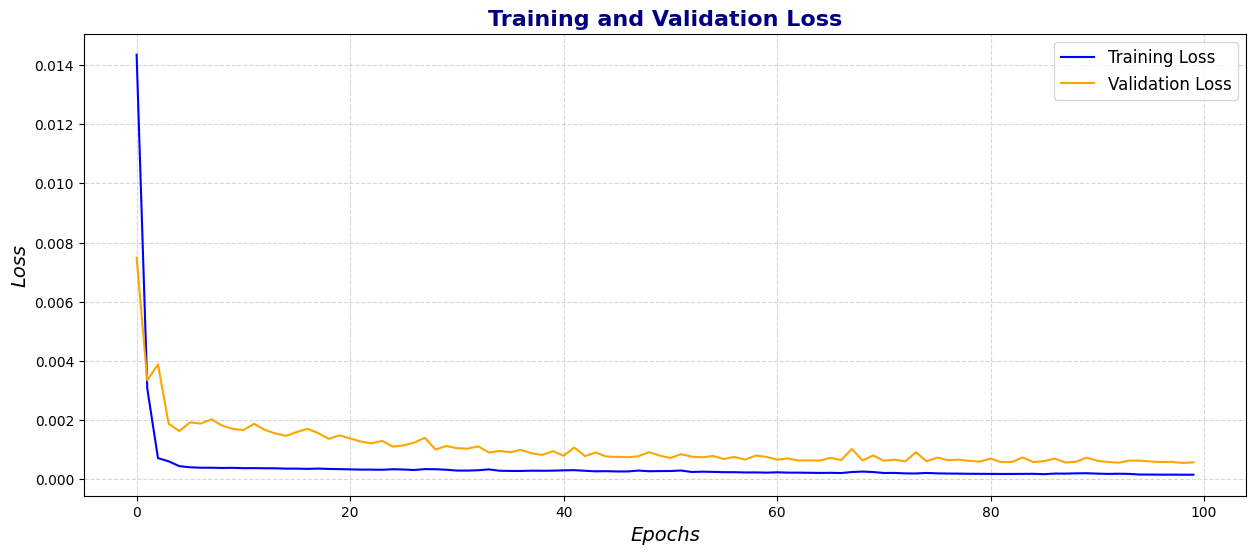

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


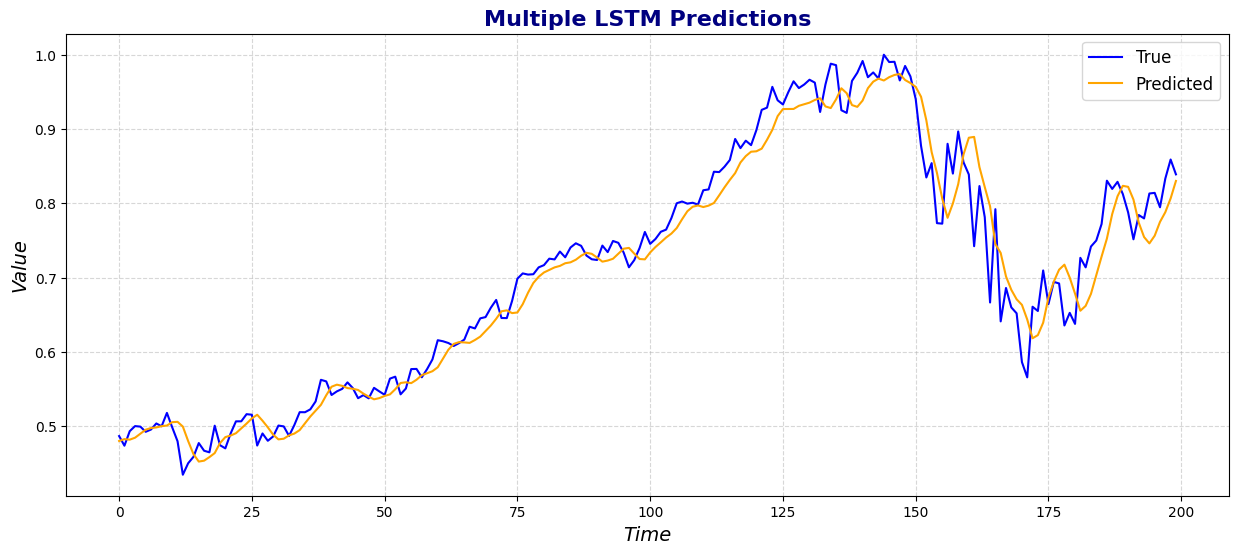

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
3,Multiple LSTM,0.034379,0.02551,0.953752,0.001182,26.830738,0


In [85]:
plot_train_history(history_multiple_lstm)
best_model = load_model('best_model.keras')
test_model(model_multiple_lstm, 'Multiple LSTM',
           X_test, y_test, 200)

In [ ]:
model_lstm_dropout = Sequential()
model_lstm_dropout.add(LSTM(50, input_shape=(100, 1)))
model_lstm_dropout.add(Dropout(0.2))
model_lstm_dropout.add(Dense(1))
model_lstm_dropout.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.00001))
model_lstm_dropout.summary()

In [ ]:
history_lstm_dropout = model_lstm_dropout.fit(X_train, y_train,
                    epochs=120, batch_size=32,
                    validation_split=0.1)

In [ ]:
plot_train_history(history_lstm_dropout)
best_model = load_model('best_model.keras')
test_model(model_lstm_dropout, 'Multiple LSTM',
           X_test, y_test, 200)

In [88]:
model_multiple_lstm_dropout = Sequential()
model_multiple_lstm_dropout.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(LSTM(50, return_sequences=True))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(LSTM(50))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(Dense(1))
model_multiple_lstm_dropout.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.01))
model_multiple_lstm_dropout.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history_multiple_lstm_dropout = model_multiple_lstm_dropout.fit(X_train, y_train,
                    epochs=100, batch_size=16,
                    validation_split=0.1)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 0.0270 - val_loss: 0.0017
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0012 - val_loss: 9.6046e-04
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 9.2893e-04 - val_loss: 0.0043
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 9.3648e-04 - val_loss: 7.3820e-04
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 8.7879e-04 - val_loss: 7.0772e-04
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 7.9948e-04 - val_loss: 0.0012
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 7.9286e-04 - val_loss: 6.2689e-04
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 8.0149e-04 - val_loss: 6.4263e

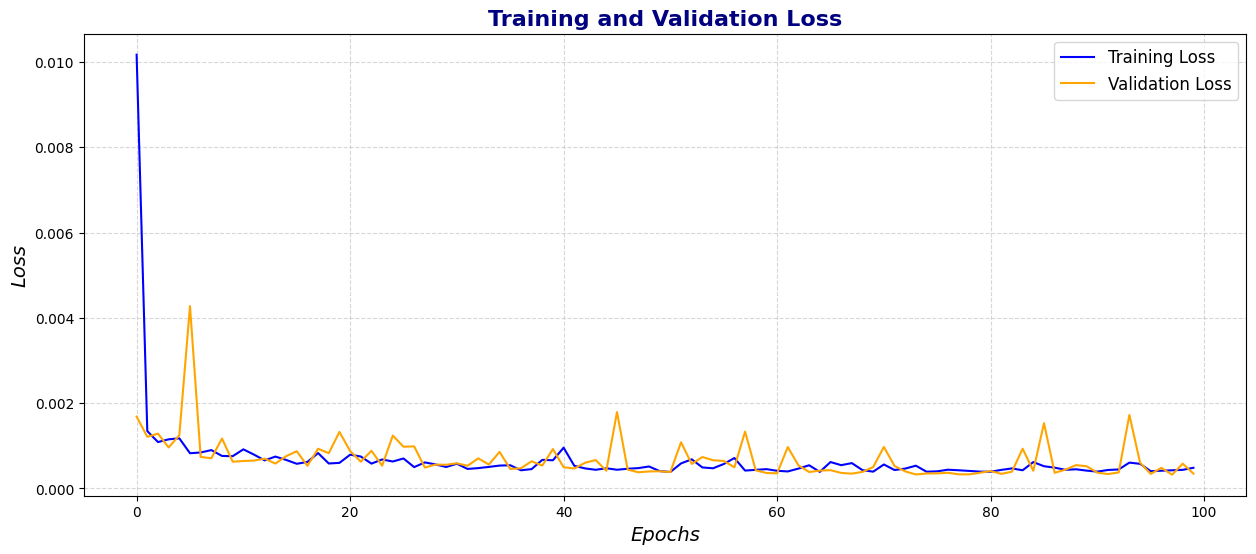

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step


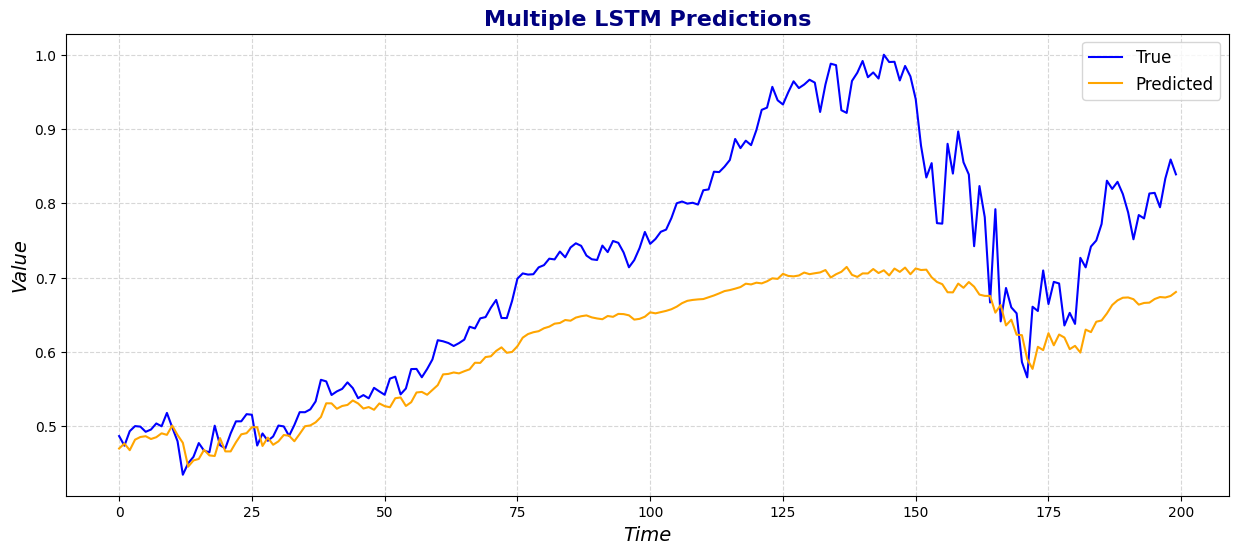

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
4,Multiple LSTM,0.130976,0.100751,0.32873,0.017155,22.52351,0


In [90]:
plot_train_history(history_multiple_lstm_dropout)
best_model = load_model('best_model.keras')
test_model(model_multiple_lstm_dropout, 'Multiple LSTM',
           X_test, y_test, 200)

In [ ]:
from keras.layers import GRU

model_lstm_gru = Sequential()
model_lstm_gru.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_lstm_gru.add(GRU(50, return_sequences=True))
model_lstm_gru.add(LSTM(50))
model_lstm_gru.add(Dense(1))
model_lstm_gru.compile(loss='mean_squared_error', optimizer='adam')
model_lstm_gru.summary()


In [ ]:
history_lstm_gru = model_lstm_gru.fit(X_train, y_train,
                    epochs=100, batch_size=32,
                    validation_split=0.1)

In [ ]:
plot_train_history(history_lstm_gru)
best_model = load_model('best_model.keras')
test_model(model_lstm_gru, 'Multiple LSTM',
           X_test, y_test, 200)